#### **Load Important Libraries and Datasets**

In [1]:
import numpy as np 
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler

import tensorflow as tf
from tensorflow.keras import datasets, layers, models, callbacks, optimizers
from keras.preprocessing.image import ImageDataGenerator

##### **Train Data**

In [2]:
train_data = pd.read_csv('/kaggle/input/arabic-hwr-ai-pro-intake1/train.csv', index_col='id')
train_data.head()

,label
id,
0,24
1,2
2,17
3,14
4,19


In [3]:
train_data['img_name'] = train_data.index
train_data['img_name'] = train_data['img_name'].astype(str).str.pad(5, fillchar='0')
train_data.head()

,label,img_name
id,,
0,24,00000
1,2,00001
2,17,00002
3,14,00003
4,19,00004


In [4]:
train_images = np.empty((train_data.shape[0], 32, 32, 3))

for i in range(train_data.shape[0]):
    img_name = train_data.loc[i, 'img_name']
    img_path = '/kaggle/input/arabic-hwr-ai-pro-intake1/train/{}.png'.format(img_name)
    
    image = mpimg.imread(img_path)
    image = image[:,:,:3]
    train_images[i] = image

In [5]:
train_images.shape

(13440, 32, 32, 3)

##### **Test Data**

In [6]:
test_data = pd.read_csv('/kaggle/input/arabic-hwr-ai-pro-intake1/test.csv', index_col='id')
test_data.head()

""
id
0
1
2
3
4


In [7]:
test_data['img_name'] = test_data.index
test_data['img_name'] = test_data['img_name'].astype(str).str.pad(5, fillchar='0')
test_data.head()

,img_name
id,
0,00000
1,00001
2,00002
3,00003
4,00004


In [8]:
test_images = np.empty((test_data.shape[0], 32, 32, 3))

for i in range(test_data.shape[0]):
    img_name = test_data.loc[i, 'img_name']
    img_path = '/kaggle/input/arabic-hwr-ai-pro-intake1/test/{}.png'.format(img_name)
    
    image = mpimg.imread(img_path)
    image = image[:,:,:3]
    test_images[i] = image

In [9]:
test_images.shape

(3360, 32, 32, 3)

### **EDA** 

In [10]:
train_data['label'].sort_values().unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28])

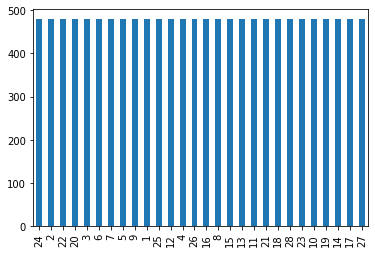

In [11]:
train_data['label'].value_counts().plot(kind='bar');

Dataset is **Balanced** and ready to trained

In [12]:
train_labels = np.array(train_data['label'].tolist())
print(train_labels)

[24  2 17 ...  2 24 13]


##### **Show Images**

In [13]:
letters_positions = []

for i in range(1, 29):
    letters_positions.append(np.where(train_labels == i)[0][0])
    
print(letters_positions)

[31, 1, 48, 20, 33, 41, 36, 17, 32, 6, 12, 23, 13, 3, 15, 18, 2, 10, 4, 51, 11, 54, 7, 0, 26, 19, 85, 9]


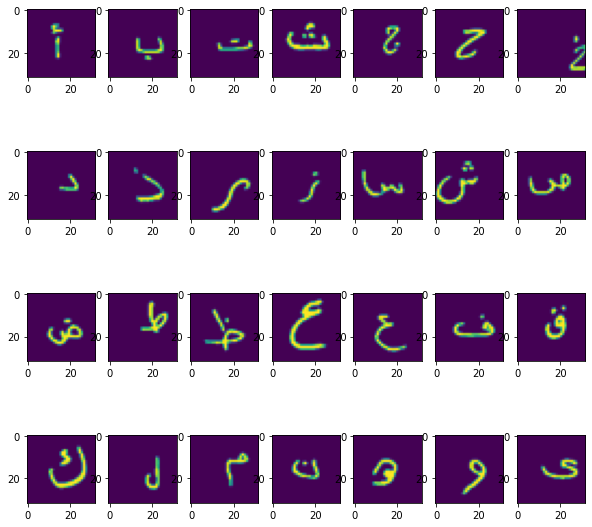

In [14]:
plt.figure(figsize=(10,10))
letter = 1
for i in range(4):
    for j in range(7):
        ax = plt.subplot2grid((4,7), (i,j))
        ax.imshow(train_images[letters_positions[letter-1]])
        letter += 1
        
plt.show()

### **Spliting Data**

In [15]:
X_train, X_valid, y_train, y_valid = train_test_split(train_images, train_labels,
                                                      test_size=0.2, stratify=train_labels,
                                                      random_state = 42)

In [16]:
print(X_train.shape)
print(X_valid.shape)

print(y_train.shape)
print(y_valid.shape)

(10752, 32, 32, 3)
(2688, 32, 32, 3)
(10752,)
(2688,)


In [17]:
print(test_images.shape)

(3360, 32, 32, 3)


##### **Normalizing Data**

In [18]:
X_train = X_train.flatten().reshape(-1, 1)
X_valid = X_valid.flatten().reshape(-1, 1)
test_images = test_images.flatten().reshape(-1, 1)

# X_train Normalizing
mms = MinMaxScaler()
mms.fit(X_train)
X_train = mms.transform(X_train)

# X_valid Normalizing
mms = MinMaxScaler()
mms.fit(X_valid)
X_valid = mms.transform(X_valid)

# Test Data Normalizing
mms = MinMaxScaler()
mms.fit(test_images)
test_images = mms.transform(test_images)

# Reshapeing Data Sets
X_train = X_train.reshape(10752, 32, 32, 3)
X_valid = X_valid.reshape(2688, 32, 32, 3)
test_images = test_images.reshape(3360, 32, 32, 3)

In [19]:
print(X_train.shape)
print(X_valid.shape)

print(test_images.shape)

(10752, 32, 32, 3)
(2688, 32, 32, 3)
(3360, 32, 32, 3)


### Modeling & Training

In [20]:
model = models.Sequential([
    
    layers.Conv2D(filters=16, kernel_size=(3, 3), #padding = 'Same',
                  activation='relu', input_shape=(32, 32, 3)),
    layers.Conv2D(filters=16, kernel_size=(5, 5), #padding = 'Same',
                  activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.3),
    
    
    layers.Conv2D(filters=32, kernel_size=(3, 3), padding = 'Same',
                  activation='relu'),
    layers.Conv2D(filters=32, kernel_size=(5, 5), padding = 'Same',
                  activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.3),
    
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), padding = 'Same',
                  activation='relu'),
    layers.Conv2D(filters=64, kernel_size=(5, 5), padding = 'Same',
                  activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.5),
    
    
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(29, activation='softmax')
])


User settings:

   KMP_AFFINITY=granularity=fine,verbose,compact,1,0
   KMP_BLOCKTIME=0
   KMP_DUPLICATE_LIB_OK=True
   KMP_INIT_AT_FORK=FALSE
   KMP_SETTINGS=1
   KMP_WARNINGS=0

Effective settings:

   KMP_ABORT_DELAY=0
   KMP_ADAPTIVE_LOCK_PROPS='1,1024'
   KMP_ALIGN_ALLOC=64
   KMP_ALL_THREADPRIVATE=128
   KMP_ATOMIC_MODE=2
   KMP_BLOCKTIME=0
   KMP_CPUINFO_FILE: value is not defined
   KMP_DETERMINISTIC_REDUCTION=false
   KMP_DEVICE_THREAD_LIMIT=2147483647
   KMP_DISP_NUM_BUFFERS=7
   KMP_DUPLICATE_LIB_OK=true
   KMP_ENABLE_TASK_THROTTLING=true
   KMP_FORCE_REDUCTION: value is not defined
   KMP_FOREIGN_THREADS_THREADPRIVATE=true
   KMP_FORKJOIN_BARRIER='2,2'
   KMP_FORKJOIN_BARRIER_PATTERN='hyper,hyper'
   KMP_GTID_MODE=3
   KMP_HANDLE_SIGNALS=false
   KMP_HOT_TEAMS_MAX_LEVEL=1
   KMP_HOT_TEAMS_MODE=0
   KMP_INIT_AT_FORK=true
   KMP_LIBRARY=throughput
   KMP_LOCK_KIND=queuing
   KMP_MALLOC_POOL_INCR=1M
   KMP_NUM_LOCKS_IN_BLOCK=1
   KMP_PLAIN_BARRIER='2,2'
   KMP_PLAIN_BARRIER_P

In [21]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

#### **Data Generation**

In [22]:
datagen = ImageDataGenerator(
        featurewise_center=False, 
        samplewise_center=False,  
        featurewise_std_normalization=False,
        samplewise_std_normalization=False,
        zca_whitening=False,
        rotation_range=10,
        zoom_range = 0.1,  
        width_shift_range=0.1, 
        height_shift_range=0.1,
        horizontal_flip=False,
        vertical_flip=False)

In [23]:
datagen.fit(X_train)

In [24]:
early_stopp = callbacks.EarlyStopping(patience=25, restore_best_weights=True)

In [25]:
history = model.fit(datagen.flow(X_train,y_train, batch_size=192),
                            validation_data=(X_valid, y_valid),
                            epochs=100, batch_size=192,
                            verbose=2, callbacks=[early_stopp])

2021-11-07 20:58:49.406026: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/100
56/56 - 17s - loss: 3.3449 - accuracy: 0.0420 - val_loss: 3.2198 - val_accuracy: 0.0424
Epoch 2/100
56/56 - 14s - loss: 3.1987 - accuracy: 0.0765 - val_loss: 2.9589 - val_accuracy: 0.1283
Epoch 3/100
56/56 - 15s - loss: 2.8439 - accuracy: 0.1087 - val_loss: 2.4249 - val_accuracy: 0.1611
Epoch 4/100
56/56 - 15s - loss: 2.5360 - accuracy: 0.1530 - val_loss: 2.1469 - val_accuracy: 0.2504
Epoch 5/100
56/56 - 14s - loss: 2.2570 - accuracy: 0.2116 - val_loss: 1.7411 - val_accuracy: 0.3088
Epoch 6/100
56/56 - 15s - loss: 1.9821 - accuracy: 0.2764 - val_loss: 1.4715 - val_accuracy: 0.4170
Epoch 7/100
56/56 - 14s - loss: 1.8106 - accuracy: 0.3223 - val_loss: 1.3073 - val_accuracy: 0.4743
Epoch 8/100
56/56 - 15s - loss: 1.6126 - accuracy: 0.3850 - val_loss: 1.1576 - val_accuracy: 0.5335
Epoch 9/100
56/56 - 14s - loss: 1.4406 - accuracy: 0.4535 - val_loss: 1.0134 - val_accuracy: 0.5811
Epoch 10/100
56/56 - 15s - loss: 1.3456 - accuracy: 0.4918 - val_loss: 0.8909 - val_accuracy: 0.6224

<AxesSubplot:>

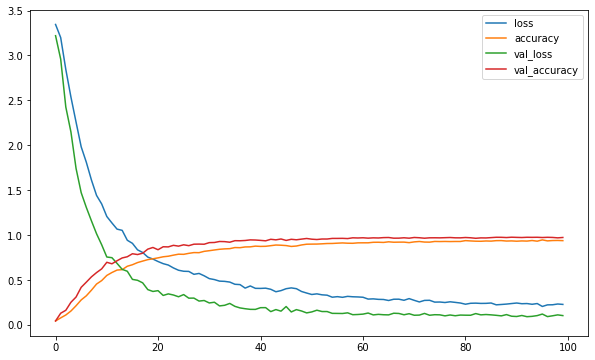

In [26]:
pd.DataFrame(history.history).plot(figsize=(10, 6))

In [27]:
model.evaluate(X_valid,y_valid)

84/84 [==============================] - 1s 13ms/step - loss: 0.1020 - accuracy: 0.9721


[0.10197053849697113, 0.9720982313156128]

In [28]:
prediction = model.predict(X_valid)
predictions = np.argmax(prediction,axis = 1)

In [29]:
print(predictions[:20])
print(y_valid[:20])

[26  8 10 16 19  8 12  3  5 20 26 24 17 22  1 10 25 28  5 26]
[26  8 10 17 19  8 12  3  5 20 26 24 17 22  1 10 25 28  5 26]


### **Test Prediction**

In [30]:
test_prediction = model.predict(test_images)
test_predictions = np.argmax(test_prediction,axis = 1)

In [31]:
test_predictions

array([26, 10,  1, ...,  4, 11, 20])

### **Submission**

In [32]:
submission = pd.read_csv('/kaggle/input/arabic-hwr-ai-pro-intake1/sample_submission.csv')
submission.head()

,id,label
0,0,1
1,1,1
2,2,1
3,3,1
4,4,1


In [33]:
submission.shape

(3360, 2)

In [34]:
submission['label'] = test_predictions

In [35]:
submission[['id', 'label']].to_csv('submission.csv', index=False)